In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rawdat = pd.read_csv("/srv/scratch/z3289452/OceanDataScience/Ship_data/NRSPHB_1953_2010.csv")

In [3]:
rawdat.columns

Index(['SURVEY_NAME', 'STATION_NO', 'START_TIME', 'END_TIME', 'MIN_DEPTH',
       'MAX_DEPTH', 'BOTTTOM_DEPTH', 'BOTTOM_TIME', 'BOTTOM_LAT', 'BOTTOM_LON',
       'END_LAT', 'END_LON', 'START_LAT', 'START_LON', 'PROJECT_NAME',
       'MARLIN_ID', 'BOTTLE_NUMBER', 'PRESSURE', 'ROSETTE_POSITION',
       'ROSETTE_POSITION_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG',
       'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG',
       'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SALINITY_VALUE',
       'SALINITY_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG',
       'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'AMMONIA_VALUE',
       'AMMONIA_QC_FLAG'],
      dtype='object')

In [4]:
# rawdat = rawdat.loc[:,~rawdat.columns.isin(['START_TIME'])]
# rawdat.drop(columns=rawdat.columns[[0,1,3,]])
rawdat = rawdat[['START_TIME','PRESSURE', 'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG', 
                 'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG', 'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG', 
                 'AMMONIA_VALUE', 'AMMONIA_QC_FLAG']]
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,< 0.02,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [5]:
rawdat.NITRATE_VALUE = rawdat.NITRATE_VALUE.where(rawdat.NITRATE_VALUE != '< 0.02', '0')
rawdat.NITRATE_VALUE = pd.to_numeric(rawdat.NITRATE_VALUE)
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [6]:
datetime = pd.to_datetime(rawdat.START_TIME, infer_datetime_format=True, dayfirst=True)
rawdat.insert(0,'Year',datetime.dt.year)
rawdat.insert(1,'Yday',datetime.dt.dayofyear)
rawdat.insert(2,'Hour',datetime.dt.hour)
rawdat.drop(columns=['START_TIME'], inplace = True)
rawdat.head()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,1953,151,0,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,1953,151,0,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,1953,151,0,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,1953,151,0,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,1953,151,0,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [7]:
nitrate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate.dropna(inplace=True)
nitrate = nitrate[(nitrate.NITRATE_QC_FLAG == 0.0) & (nitrate.TEMPERATURE_QC_FLAG == 0.0) & (nitrate.SALINITY_QC_FLAG == 0.0)]
nitrate.head(), nitrate.shape

(    Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 1   1953   151     0      10.0               18.6                  0.0   
 3   1953   151     0      30.0               18.8                  0.0   
 6   1953   151     0      75.0               17.1                  0.0   
 7   1953   151     0     100.0               16.2                  0.0   
 10  1953   160     0      20.0               18.0                  0.0   
 
     SALINITY_VALUE  SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  
 1           35.371               0.0            0.1              0.0  
 3           35.462               0.0            1.2              0.0  
 6           35.480               0.0            3.1              0.0  
 7           35.570               0.0            6.7              0.0  
 10          35.389               0.0            0.2              0.0  ,
 (13193, 10))

In [8]:
nitrate.tail(50)

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG
15433,2009,174,23,75.0,16.473,0.0,35.434,0.0,8.51,0.0
15434,2009,174,23,100.0,16.300,0.0,35.466,0.0,8.56,0.0
15435,2009,195,23,0.0,17.331,0.0,35.486,0.0,2.14,0.0
15436,2009,195,23,10.0,16.960,0.0,35.501,0.0,2.29,0.0
15438,2009,195,23,25.0,16.900,0.0,35.477,0.0,3.74,0.0
15441,2009,195,23,50.0,16.860,0.0,35.478,0.0,4.71,0.0
15443,2009,195,23,75.0,16.819,0.0,35.471,0.0,4.59,0.0
15444,2009,195,23,100.0,16.850,0.0,35.497,0.0,4.41,0.0
15445,2009,231,23,0.0,17.029,0.0,35.542,0.0,0.46,0.0
15446,2009,231,23,10.0,17.010,0.0,35.571,0.0,0.51,0.0


In [15]:
nitrite = rawdat.drop(columns=['NITRATE_VALUE','NITRATE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrite.dropna(inplace=True)
nitrite = nitrite[(nitrite.NITRITE_QC_FLAG == 0.0) & (nitrite.TEMPERATURE_QC_FLAG == 0.0) & (nitrite.SALINITY_QC_FLAG == 0.0)]
nitrite.head(), nitrite.shape

(Empty DataFrame
 Columns: [Year, Yday, Hour, PRESSURE, TEMPERATURE_VALUE, TEMPERATURE_QC_FLAG, SALINITY_VALUE, SALINITY_QC_FLAG, NITRITE_VALUE, NITRITE_QC_FLAG]
 Index: [], (0, 10))

In [16]:
oxygen = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
oxygen.dropna(inplace=True)
oxygen = oxygen[(oxygen.OXYGEN_QC_FLAG == 0.0) & (oxygen.TEMPERATURE_QC_FLAG == 0.0) & (oxygen.SALINITY_QC_FLAG == 0.0)]
oxygen.head(), oxygen.shape

(   Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 0  1953   151     0       0.0               18.6                  0.0   
 1  1953   151     0      10.0               18.6                  0.0   
 2  1953   151     0      20.0               18.7                  0.0   
 3  1953   151     0      30.0               18.8                  0.0   
 4  1953   151     0      40.0               18.8                  0.0   
 
    SALINITY_VALUE  SALINITY_QC_FLAG  OXYGEN_VALUE  OXYGEN_QC_FLAG  
 0          35.444               0.0        240.79             0.0  
 1          35.371               0.0        242.13             0.0  
 2          35.462               0.0        248.38             0.0  
 3          35.462               0.0        238.55             0.0  
 4          35.444               0.0        232.30             0.0  ,
 (12970, 10))

In [17]:
phosphate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
phosphate.dropna(inplace=True)
phosphate = phosphate[(phosphate.PHOSPHATE_QC_FLAG == 0.0) & (phosphate.TEMPERATURE_QC_FLAG == 0.0) & (phosphate.SALINITY_QC_FLAG == 0.0)]
phosphate.PHOSPHATE_VALUE = pd.to_numeric(phosphate.PHOSPHATE_VALUE)
phosphate.head(), phosphate.shape

(   Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 0  1953   151     0       0.0               18.6                  0.0   
 1  1953   151     0      10.0               18.6                  0.0   
 2  1953   151     0      20.0               18.7                  0.0   
 3  1953   151     0      30.0               18.8                  0.0   
 4  1953   151     0      40.0               18.8                  0.0   
 
    SALINITY_VALUE  SALINITY_QC_FLAG  PHOSPHATE_VALUE  PHOSPHATE_QC_FLAG  
 0          35.444               0.0             0.26                0.0  
 1          35.371               0.0             0.26                0.0  
 2          35.462               0.0             0.29                0.0  
 3          35.462               0.0             0.26                0.0  
 4          35.444               0.0             0.29                0.0  ,
 (13442, 10))

In [18]:
silicate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'NITRATE_VALUE','NITRATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
silicate.dropna(inplace=True)
silicate = silicate[(silicate.SILICATE_QC_FLAG == 0.0) & (silicate.TEMPERATURE_QC_FLAG == 0.0) & (silicate.SALINITY_QC_FLAG == 0.0)]
silicate.SILICATE_VALUE = pd.to_numeric(silicate.SILICATE_VALUE)
silicate.head(), silicate.shape

(      Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 5077  1968    71     0       0.0             23.582                  0.0   
 5078  1968    71     0      10.0             23.399                  0.0   
 5079  1968    71     0      20.0             23.105                  0.0   
 5080  1968    71     0      30.0             22.627                  0.0   
 5081  1968    71     0      40.0             20.788                  0.0   
 
       SALINITY_VALUE  SALINITY_QC_FLAG  SILICATE_VALUE  SILICATE_QC_FLAG  
 5077          35.548               0.0             0.6               0.0  
 5078          35.539               0.0             0.5               0.0  
 5079          35.505               0.0             0.4               0.0  
 5080          35.517               0.0             0.5               0.0  
 5081          35.497               0.0             1.7               0.0  ,
 (8350, 10))

In [19]:
ammonia = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','NITRATE_VALUE','NITRATE_QC_FLAG'])
ammonia.dropna(inplace=True)
ammonia = ammonia[(ammonia.AMMONIA_QC_FLAG == 0.0) & (ammonia.TEMPERATURE_QC_FLAG == 0.0) & (ammonia.SALINITY_QC_FLAG == 0.0)]
ammonia.head(), ammonia.shape

(Empty DataFrame
 Columns: [Year, Yday, Hour, PRESSURE, TEMPERATURE_VALUE, TEMPERATURE_QC_FLAG, SALINITY_VALUE, SALINITY_QC_FLAG, AMMONIA_VALUE, AMMONIA_QC_FLAG]
 Index: [], (0, 10))

## relative distribution of variables

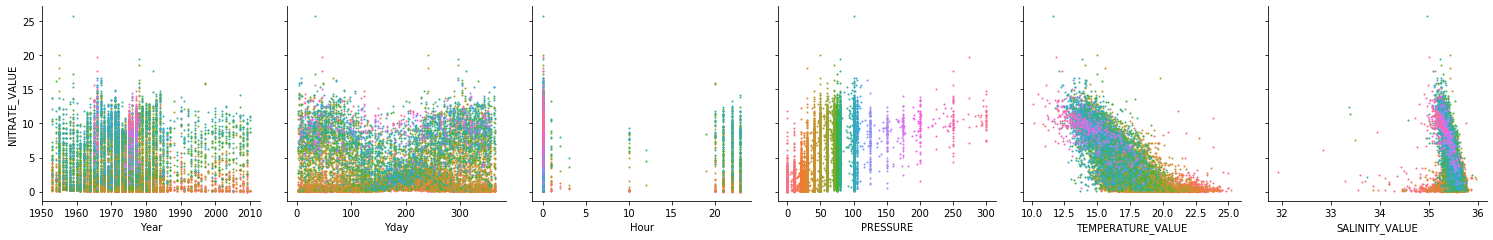

In [14]:
p = sns.PairGrid(data=nitrate, y_vars="NITRATE_VALUE", x_vars=["Year","Yday","Hour","PRESSURE","TEMPERATURE_VALUE","SALINITY_VALUE"], height=3.5, hue="PRESSURE")
p.map(plt.scatter, s=1)

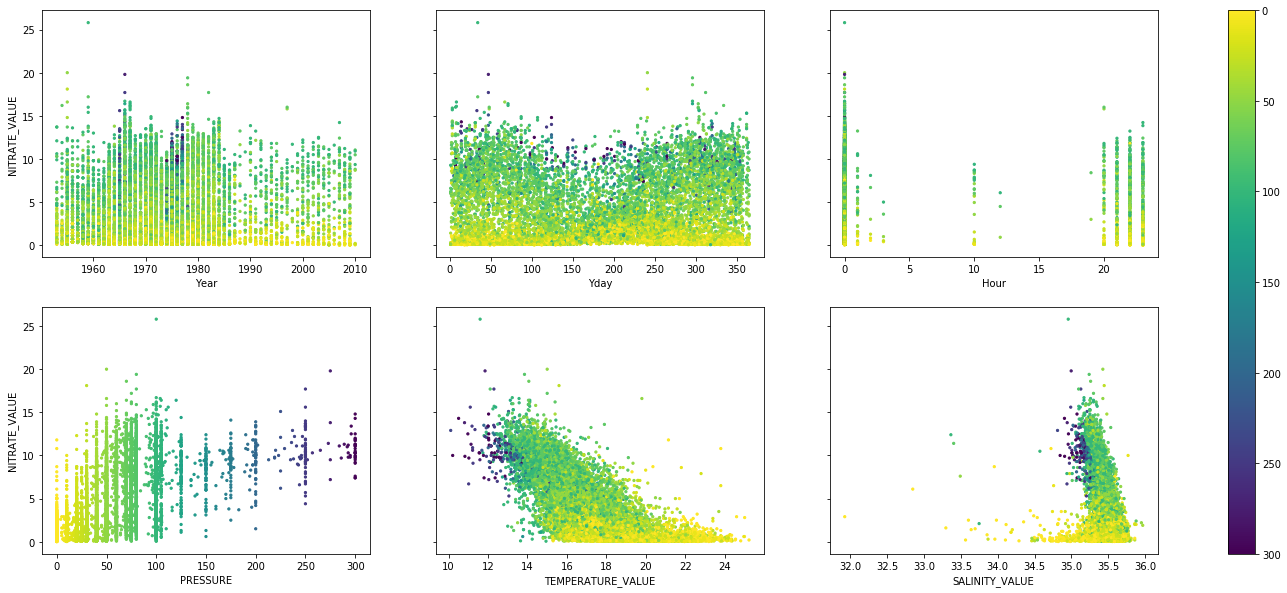

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=nitrate[nitrate.columns[xcol]], y=nitrate[nitrate.columns[-2]], c=nitrate.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(nitrate.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(nitrate.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

In [9]:
nitrate = nitrate.iloc[np.where((nitrate.NITRATE_VALUE > 1) & (nitrate.NITRATE_VALUE < 24))]
nitrate = nitrate.iloc[np.where((nitrate.SALINITY_VALUE > 35) & (nitrate.SALINITY_VALUE < 35.8))]
nitrate = nitrate.iloc[np.where(nitrate.PRESSURE < 120)]

In [10]:
len(nitrate)

8633

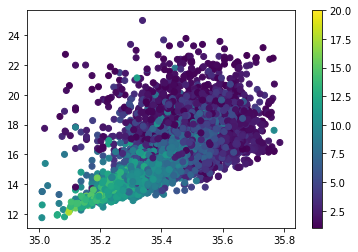

In [11]:
plt.scatter(nitrate.SALINITY_VALUE, nitrate.TEMPERATURE_VALUE, c = nitrate.NITRATE_VALUE)
plt.colorbar()

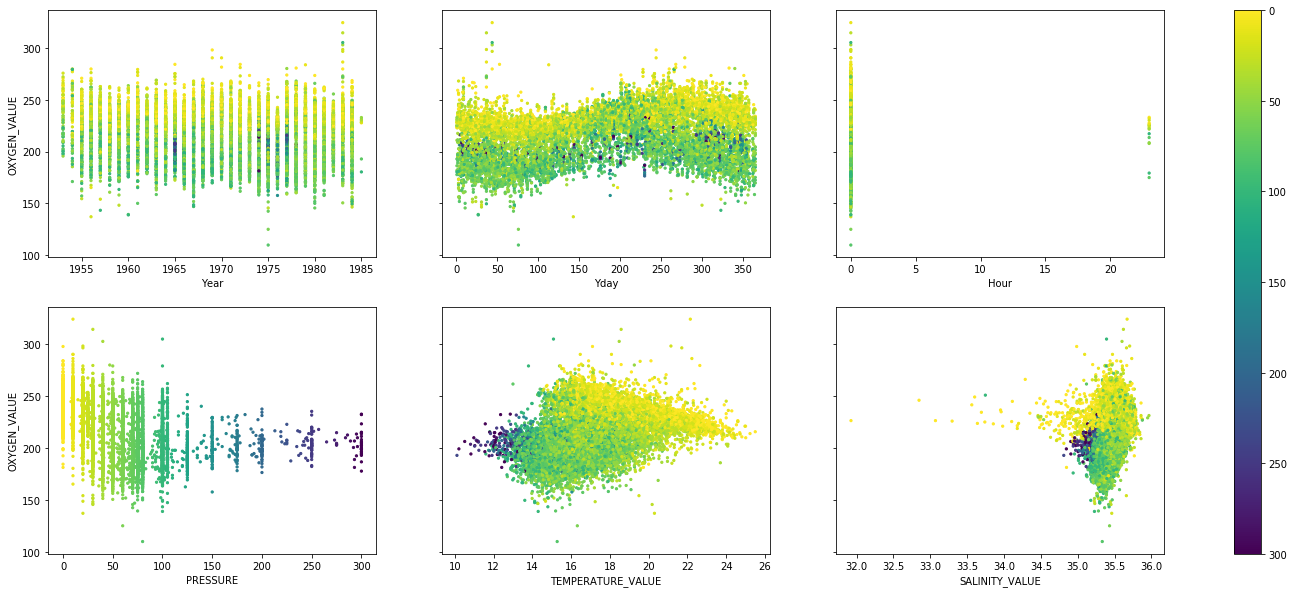

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=oxygen[oxygen.columns[xcol]], y=oxygen[oxygen.columns[-2]], c=oxygen.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(oxygen.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(oxygen.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

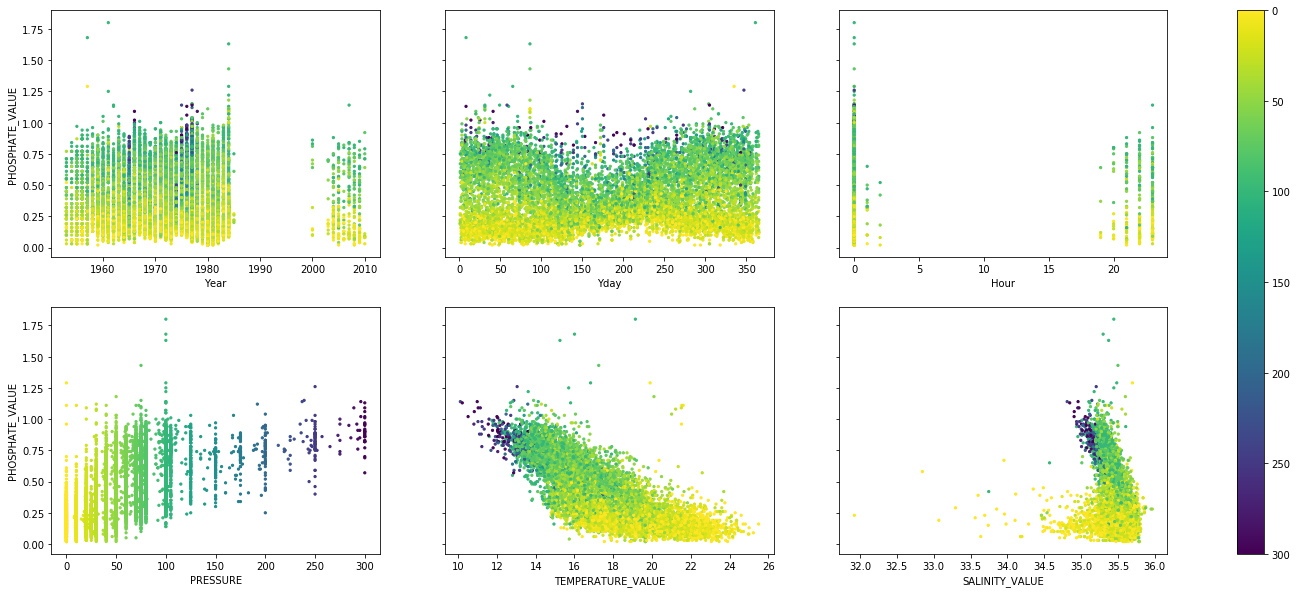

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=phosphate[phosphate.columns[xcol]], y=phosphate[phosphate.columns[-2]], c=phosphate.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(phosphate.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(phosphate.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

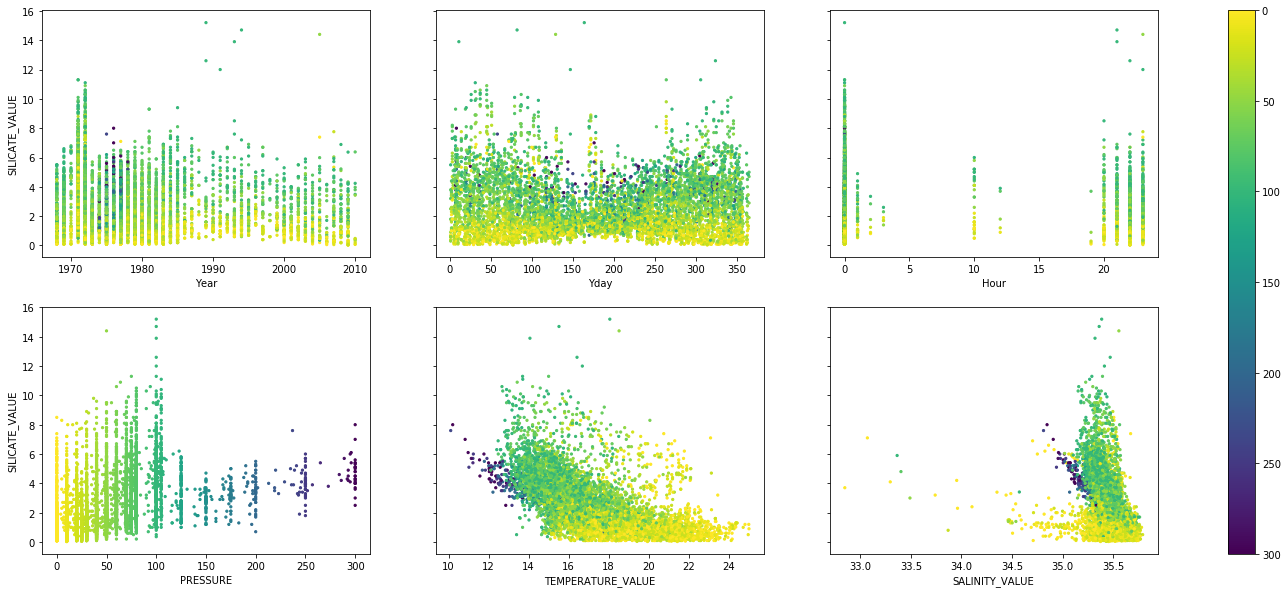

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,10))
for ax, xcol in zip(axes.flat, [0,1,2,3,4,6]):
    sc = ax.scatter(x=silicate[silicate.columns[xcol]], y=silicate[silicate.columns[-2]], c=silicate.PRESSURE, s=5, cmap=plt.get_cmap("viridis_r"))
    ax.set_xlabel(silicate.columns[xcol])
    if xcol in [0,3]: ax.set_ylabel(silicate.columns[-2])
cbar = plt.colorbar(sc, ax=axes.ravel().tolist())
cbar.ax.invert_yaxis()

## Standardisation

In [40]:
nitrate.dtypes

Year                     int64
Yday                     int64
Hour                     int64
PRESSURE               float64
TEMPERATURE_VALUE      float64
TEMPERATURE_QC_FLAG    float64
SALINITY_VALUE         float64
SALINITY_QC_FLAG       float64
NITRATE_VALUE          float64
NITRATE_QC_FLAG        float64
dtype: object

In [41]:
stats = nitrate.describe()
stats['NITRATE_VALUE']['mean'] = 0
stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
nitrate_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,8633.0,1973.864126,11.092018,1953.000,1967.000,1973.000,1979.000,2010.000
Yday,8633.0,189.793930,100.971686,1.000,103.000,201.000,271.000,365.000
Hour,8633.0,1.684119,5.813557,0.000,0.000,0.000,0.000,23.000
PRESSURE,8633.0,56.288938,28.406338,0.000,40.000,53.000,75.000,117.000
TEMPERATURE_VALUE,8633.0,16.426921,1.722881,11.740,15.233,16.300,17.500,25.010
TEMPERATURE_QC_FLAG,8633.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
SALINITY_VALUE,8633.0,35.452761,0.114994,35.009,35.375,35.455,35.535,35.787
SALINITY_QC_FLAG,8633.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
NITRATE_VALUE,8633.0,0.000000,1.000000,1.010,2.300,4.700,8.100,20.000
NITRATE_QC_FLAG,8633.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [42]:
nitrate = (nitrate - stats['mean'])/stats['std']
nitrate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG'], inplace=True)
nitrate.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
count,8.633000e+03,8.633000e+03,8.633000e+03,8.633000e+03,8.633000e+03,8.633000e+03,8633.000000
mean,3.344892e-15,-6.749045e-17,1.053509e-16,-9.876651e-18,1.451868e-15,5.201703e-14,5.390403
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.419210
min,-1.881004e+00,-1.869771e+00,-2.896882e-01,-1.981563e+00,-2.720398e+00,-3.858994e+00,1.010000
25%,-6.188348e-01,-8.595868e-01,-2.896882e-01,-5.734262e-01,-6.929795e-01,-6.762150e-01,2.300000
50%,-7.790522e-02,1.109823e-01,-2.896882e-01,-1.157818e-01,-7.366784e-02,1.947435e-02,4.700000
75%,4.630243e-01,8.042460e-01,-2.896882e-01,6.586932e-01,6.228401e-01,7.151637e-01,8.100000
max,3.257827e+00,1.735200e+00,3.666581e+00,2.137236e+00,4.981819e+00,2.906585e+00,20.000000


In [43]:
nitrate.head()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
3,-1.881004,-0.384206,-0.289688,-0.925460,1.377390,0.080347,1.2
6,-1.881004,-0.384206,-0.289688,0.658693,0.390671,0.236877,3.1
7,-1.881004,-0.384206,-0.289688,1.538778,-0.131710,1.019528,6.7
12,-1.881004,-0.295072,-0.289688,-0.573426,0.913052,0.080347,1.4
14,-1.881004,-0.295072,-0.289688,0.658693,0.855009,-0.076183,1.4


In [22]:
stats = oxygen.describe()
stats['OXYGEN_VALUE']['mean'] = 0
stats['OXYGEN_VALUE']['std'] = 1
stats = stats.transpose()
oxygen_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,12970.0,1970.413030,8.419602,1953.000,1964.00000,1971.00,1977.00,1985.000
Yday,12970.0,183.796530,105.020247,1.000,92.00000,187.00,275.00,365.000
Hour,12970.0,0.028373,0.807359,0.000,0.00000,0.00,0.00,23.000
PRESSURE,12970.0,47.623531,41.024090,0.000,20.00000,40.00,70.00,300.000
TEMPERATURE_VALUE,12970.0,17.498877,2.411700,10.110,15.75925,17.24,19.05,25.500
TEMPERATURE_QC_FLAG,12970.0,0.000000,0.000000,0.000,0.00000,0.00,0.00,0.000
SALINITY_VALUE,12970.0,35.461692,0.164354,31.924,35.38600,35.48,35.56,35.967
SALINITY_QC_FLAG,12970.0,0.000000,0.000000,0.000,0.00000,0.00,0.00,0.000
OXYGEN_VALUE,12970.0,0.000000,1.000000,109.900,199.69000,222.92,234.98,324.320
OXYGEN_QC_FLAG,12970.0,0.000000,0.000000,0.000,0.00000,0.00,0.00,0.000


In [61]:
oxygen = (oxygen - stats['mean'])/stats['std']
oxygen.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','OXYGEN_QC_FLAG'], inplace=True)
oxygen.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,OXYGEN_VALUE
count,1.297000e+04,1.297000e+04,12970.000000,1.297000e+04,1.297000e+04,1.297000e+04,12970.000000
mean,-8.204386e-15,1.314805e-16,0.000000,8.765369e-18,4.908607e-16,4.382685e-15,218.042145
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,23.011995
min,-2.068154e+00,-1.740584e+00,-0.035143,-1.160867e+00,-3.063763e+00,-2.152486e+01,109.900000
25%,-7.616786e-01,-8.740841e-01,-0.035143,-6.733490e-01,-7.213280e-01,-4.605411e-01,199.690000
50%,6.971469e-02,3.050335e-02,-0.035143,-1.858306e-01,-1.073420e-01,1.113958e-01,222.920000
75%,7.823375e-01,8.684370e-01,-0.035143,5.454471e-01,6.431659e-01,5.981507e-01,234.980000
max,1.732501e+00,1.725415e+00,28.452813,6.151909e+00,3.317628e+00,3.074516e+00,324.320000


In [23]:
stats = phosphate.describe()
stats['PHOSPHATE_VALUE']['mean'] = 0
stats['PHOSPHATE_VALUE']['std'] = 1
stats = stats.transpose()
phosphate_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,13442.0,1971.338194,10.073765,1953.000,1964.000,1972.00,1977.000,2010.000
Yday,13442.0,183.453802,105.142586,1.000,91.000,187.00,275.000,365.000
Hour,13442.0,0.506472,3.303441,0.000,0.000,0.00,0.000,23.000
PRESSURE,13442.0,47.409924,40.729996,0.000,20.000,40.00,70.000,300.000
TEMPERATURE_VALUE,13442.0,17.503478,2.409211,10.110,15.760,17.24,19.050,25.500
TEMPERATURE_QC_FLAG,13442.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
SALINITY_VALUE,13442.0,35.461049,0.162961,31.924,35.387,35.48,35.557,35.967
SALINITY_QC_FLAG,13442.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000
PHOSPHATE_VALUE,13442.0,0.000000,1.000000,0.020,0.210,0.33,0.570,1.800
PHOSPHATE_QC_FLAG,13442.0,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000


In [63]:
phosphate.PHOSPHATE_VALUE = pd.to_numeric(phosphate.PHOSPHATE_VALUE)
phosphate = (phosphate - stats['mean'])/stats['std']
phosphate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','PHOSPHATE_QC_FLAG'], inplace=True)
phosphate.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,PHOSPHATE_VALUE
count,1.344200e+04,1.344200e+04,1.344200e+04,1.344200e+04,1.344200e+04,1.344200e+04,13442.000000
mean,-5.751157e-15,1.289781e-16,3.383033e-17,1.310925e-16,6.512339e-16,1.483460e-14,0.393668
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.229132
min,-1.820391e+00,-1.735299e+00,-1.533166e-01,-1.164005e+00,-3.068838e+00,-2.170491e+01,0.020000
25%,-7.284460e-01,-8.793183e-01,-1.533166e-01,-6.729665e-01,-7.236718e-01,-4.543995e-01,0.210000
50%,6.569602e-02,3.372752e-02,-1.533166e-01,-1.819279e-01,-1.093627e-01,1.162898e-01,0.330000
75%,5.620348e-01,8.706862e-01,-1.533166e-01,5.546300e-01,6.419206e-01,5.887960e-01,0.570000
max,3.837871e+00,1.726667e+00,6.809120e+00,6.201574e+00,3.319146e+00,3.104738e+00,1.800000


In [24]:
stats = silicate.describe()
stats['SILICATE_VALUE']['mean'] = 0
stats['SILICATE_VALUE']['std'] = 1
stats = stats.transpose()
silicate_stats = stats
stats

,count,mean,std,min,25%,50%,75%,max
Year,8350.0,1979.307904,9.470199,1968.000,1972.000,1977.0000,1982.000,2010.000
Yday,8350.0,185.811018,101.898515,1.000,98.000,192.0000,271.000,365.000
Hour,8350.0,2.891257,7.382677,0.000,0.000,0.0000,0.000,23.000
PRESSURE,8350.0,51.397449,42.625235,0.000,20.000,50.0000,75.000,300.000
TEMPERATURE_VALUE,8350.0,17.225560,2.343868,10.110,15.530,16.8975,18.620,25.010
TEMPERATURE_QC_FLAG,8350.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000
SALINITY_VALUE,8350.0,35.455550,0.156546,32.847,35.383,35.4710,35.548,35.791
SALINITY_QC_FLAG,8350.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000
SILICATE_VALUE,8350.0,0.000000,1.000000,0.030,1.100,2.0000,3.600,15.200
SILICATE_QC_FLAG,8350.0,0.000000,0.000000,0.000,0.000,0.0000,0.000,0.000


In [65]:
silicate.SILICATE_VALUE = pd.to_numeric(silicate.SILICATE_VALUE)
silicate = (silicate - stats['mean'])/stats['std']
silicate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','SILICATE_QC_FLAG'], inplace=True)
silicate.describe()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,SILICATE_VALUE
count,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8350.000000
mean,9.986742e-15,3.935641e-17,5.446076e-17,-8.722231e-17,-3.539949e-16,9.499999e-15,2.496484
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.822564
min,-1.194051e+00,-1.813677e+00,-3.916272e-01,-1.205799e+00,-3.035820e+00,-1.666316e+01,0.030000
25%,-7.716737e-01,-8.617497e-01,-3.916272e-01,-7.365930e-01,-7.234027e-01,-4.634432e-01,1.100000
50%,-2.437018e-01,6.073672e-02,-3.916272e-01,-3.278455e-02,-1.399654e-01,9.869190e-02,2.000000
75%,2.842702e-01,8.360179e-01,-3.916272e-01,5.537225e-01,5.949309e-01,5.905601e-01,3.600000
max,3.240913e+00,1.758504e+00,2.723774e+00,5.832286e+00,3.321194e+00,2.142820e+00,15.200000


## Save data with binary serialisation

In [44]:
import pickle

In [45]:
pickle_out = open("../data/nitrate.pickle", "wb")
pickle.dump(nitrate, pickle_out)
pickle_out.close()

In [68]:
pickle_out = open("../data/oxygen.pickle", "wb")
pickle.dump(oxygen, pickle_out)
pickle_out.close()

In [69]:
pickle_out = open("../data/phosphate.pickle", "wb")
pickle.dump(phosphate, pickle_out)
pickle_out.close()

In [70]:
pickle_out = open("../data/silicate.pickle", "wb")
pickle.dump(silicate, pickle_out)
pickle_out.close()

In [46]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_nitrate.pickle", "wb")
pickle.dump(nitrate_stats, pickle_out)
pickle_out.close()

In [33]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_oxygen.pickle", "wb")
pickle.dump(oxygen_stats, pickle_out)
pickle_out.close()

In [34]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_phosphate.pickle", "wb")
pickle.dump(phosphate_stats, pickle_out)
pickle_out.close()

In [35]:
# save stats for identical standardisation
pickle_out = open("../data/standardisation_silicate.pickle", "wb")
pickle.dump(silicate_stats, pickle_out)
pickle_out.close()